In [1]:
import sys
sys.path.append("../") 
import numSolvers
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate
np.set_printoptions(linewidth = 150)
# %matplotlib notebook

## First see the solution of vv' = -c differential equation
with c = -grad(p)/\rho this is the momentum equation without viscosity, v is the speed of flow.

In [2]:
def diffModelP3(v, x, gp):
    """ yy' = gp    diffequation , gp is a constant : the pressure gradient/density, y is speed
    :param v: speed
    :param x: spatial coordinate
    :return: v'
    """
    dvdx = gp/v
    return dvdx

def exactP3(x,gp, x0, v0):
    """ yy' = gp    diffequation , gp assumed constant the pressure gradient/density, y is speed Exact Analytic Solution
    """
    gc = v0**2 - 2* gp * x0
    vex = math.sqrt( 2.0 * gp *x + gc )
    return vex

In [3]:
    L = 0.1 #meter
    xs = np.linspace(0,L, 100) # meter
    DeltaP = 1e5 # 1bar
    D = 500 # kg/m^3
    gp = - DeltaP / L / D
    print(' gp parameter {}'.format(gp))
    initvals = [23.0] # m/s

 gp parameter -2000.0


In [4]:
xs

array([0.        , 0.0010101 , 0.0020202 , 0.0030303 , 0.0040404 , 0.00505051, 0.00606061, 0.00707071, 0.00808081, 0.00909091, 0.01010101,
       0.01111111, 0.01212121, 0.01313131, 0.01414141, 0.01515152, 0.01616162, 0.01717172, 0.01818182, 0.01919192, 0.02020202, 0.02121212,
       0.02222222, 0.02323232, 0.02424242, 0.02525253, 0.02626263, 0.02727273, 0.02828283, 0.02929293, 0.03030303, 0.03131313, 0.03232323,
       0.03333333, 0.03434343, 0.03535354, 0.03636364, 0.03737374, 0.03838384, 0.03939394, 0.04040404, 0.04141414, 0.04242424, 0.04343434,
       0.04444444, 0.04545455, 0.04646465, 0.04747475, 0.04848485, 0.04949495, 0.05050505, 0.05151515, 0.05252525, 0.05353535, 0.05454545,
       0.05555556, 0.05656566, 0.05757576, 0.05858586, 0.05959596, 0.06060606, 0.06161616, 0.06262626, 0.06363636, 0.06464646, 0.06565657,
       0.06666667, 0.06767677, 0.06868687, 0.06969697, 0.07070707, 0.07171717, 0.07272727, 0.07373737, 0.07474747, 0.07575758, 0.07676768,
       0.07777778, 0.078787

In [5]:
func = lambda v, x : diffModelP3(v,x , gp)

solutions with my solvers:

In [6]:
    y_numEuler = numSolvers.IVEuler(func, initvals, xs)
    y_numRG4 = numSolvers.RungeKutta4(func, initvals, xs)

solutions from scipy library functions:

In [7]:
    funcrev = lambda t, v: diffModelP3(v,t, gp)
    y_scipy = scipy.integrate.solve_ivp(funcrev, [xs.min(), xs.max()], initvals,
                              method='RK45')

 the analytical solution:

In [8]:
y_anal = np.array([ exactP3(xi , gp, 0.0, initvals[0])  for xi in xs ])

plotting the results:

Text(0.5, 1.0, "numerical solution of equation yy'= gp ")

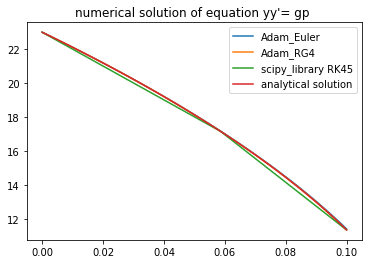

In [9]:
    # print(y_numRG4)
    plt.plot(xs, y_numEuler[:,1])
    plt.plot(xs, y_numRG4[:, 1])
    plt.plot(y_scipy.t, y_scipy.y[0,:])
    plt.plot(xs, y_anal)
    plt.legend(['Adam_Euler', 'Adam_RG4', 'scipy_library RK45', 'analytical solution'])
    plt.title("numerical solution of equation yy'= gp ")

Great, all 3 numerical solutions agree well with the analytic solution

##  vv' = -c + nu * v'' differential equation
with c = -grad(p)/\rho , v is speed of the flow
nu = kinematic viscosity = dynamic viscosity (mu)/ density 

In [10]:
def diffModelP4(y, x, gp, nu):
    """ 0 = yy' + gp - nu * v''   diffequation , gp is the pressure gradient/density, y is speed
    :param v: speed
    :param x: spatial coordinate
    :param gp: pressure gradient/ Density . gp positive !! 
    :param nu: kinematic viscosity, mu/density
    :return: v' vector
    """
    v, w = y # w = v' the new auxiliary variable
    dvdx = w
    dwdx = v * w / nu + gp / nu
    return np.array([dvdx, dwdx ])

In [11]:
L = 0.1 #meter
xs = np.linspace(0,L, 100) # meter
DeltaP = 1e4 # 0.1bar
D = 500 # kg/m^3
gp = DeltaP /  L / D
# mu = 100e-6 # Pa sec
mu = 100e-6 # fake value
nu = mu /D
print(' gp parameter {} kin viscosity {}'.format(gp, nu))
initvals = np.array([3.0, 0.0]) # [v0, v'0]  [m/s , 1/s]

 gp parameter 200.0 kin viscosity 2.0000000000000002e-07


In [12]:
func = lambda v, x: diffModelP4(v, x, gp,nu)
y_numEuler = numSolvers.IVEuler(func, initvals, xs)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [13]:
y_numEuler[-20:]

array([[0.08080808,        inf,        inf],
       [0.08181818,        inf,        inf],
       [0.08282828,        inf,        inf],
       [0.08383838,        inf,        inf],
       [0.08484848,        inf,        inf],
       [0.08585859,        inf,        inf],
       [0.08686869,        inf,        inf],
       [0.08787879,        inf,        inf],
       [0.08888889,        inf,        inf],
       [0.08989899,        inf,        inf],
       [0.09090909,        inf,        inf],
       [0.09191919,        inf,        inf],
       [0.09292929,        inf,        inf],
       [0.09393939,        inf,        inf],
       [0.09494949,        inf,        inf],
       [0.0959596 ,        inf,        inf],
       [0.0969697 ,        inf,        inf],
       [0.0979798 ,        inf,        inf],
       [0.0989899 ,        inf,        inf],
       [0.1       ,        inf,        inf]])

In [14]:
y_numRG4 = numSolvers.RungeKutta4(func, initvals, xs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [15]:
y_numRG4[0:20,:]

array([[0.00000000e+000, 3.00000000e+000, 0.00000000e+000],
       [1.01010101e-003, 8.39682057e+011, 1.62280955e+025],
       [2.02020202e-003, 1.05236123e+103, 3.78524565e+172],
       [3.03030303e-003,             inf,             inf],
       [4.04040404e-003,             inf,             inf],
       [5.05050505e-003,             inf,             inf],
       [6.06060606e-003,             inf,             inf],
       [7.07070707e-003,             inf,             inf],
       [8.08080808e-003,             inf,             inf],
       [9.09090909e-003,             inf,             inf],
       [1.01010101e-002,             inf,             inf],
       [1.11111111e-002,             inf,             inf],
       [1.21212121e-002,             inf,             inf],
       [1.31313131e-002,             inf,             inf],
       [1.41414141e-002,             inf,             inf],
       [1.51515152e-002,             inf,             inf],
       [1.61616162e-002,             inf

In [16]:
funcrev = lambda t, v: diffModelP4(v, t, gp, nu)
y_scipyBDF = scipy.integrate.solve_ivp(funcrev, [xs.min(), xs.max()], initvals,
                                        method='BDF')

In [17]:
y_scipyRK = scipy.integrate.solve_ivp(funcrev, [xs.min(), xs.max()], initvals,
                                        method='RK45')

In [18]:
y_scipyBDF.message

'Required step size is less than spacing between numbers.'

**scipy also failed to find convergent solution**

In [19]:
np.hstack( (y_scipyBDF.t.reshape((-1,1)), y_scipyBDF.y.transpose()) )

array([[0.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       [9.70983544e-13, 3.00000000e+00, 9.70995478e-04],
       [1.94196709e-12, 3.00000000e+00, 1.94200475e-03],
       [1.16518025e-11, 3.00000000e+00, 1.16533127e-02],
       [2.13616380e-11, 3.00000000e+00, 2.13660041e-02],
       [1.03218641e-10, 3.00000000e+00, 1.03301241e-01],
       [1.85075643e-10, 3.00000000e+00, 1.85335826e-01],
       [2.66932646e-10, 3.00000000e+00, 2.67470845e-01],
       [1.08550267e-09, 3.00000000e+00, 1.09441214e+00],
       [1.90407270e-09, 3.00000000e+00, 1.93157188e+00],
       [2.72264273e-09, 3.00000000e+00, 2.77907343e+00],
       [7.43238701e-09, 3.00000003e+00, 7.86282686e+00],
       [1.21421313e-08, 3.00000008e+00, 1.33187556e+01],
       [1.68518756e-08, 3.00000015e+00, 1.91740465e+01],
       [2.15616199e-08, 3.00000026e+00, 2.54579394e+01],
       [3.86211747e-08, 3.00000091e+00, 5.23268048e+01],
       [5.56807296e-08, 3.00000209e+00, 8.70394095e+01],
       [7.27402845e-08, 3.00000

In [20]:
y_scipyBDF.t

array([0.00000000e+00, 9.70983544e-13, 1.94196709e-12, 1.16518025e-11, 2.13616380e-11, 1.03218641e-10, 1.85075643e-10, 2.66932646e-10,
       1.08550267e-09, 1.90407270e-09, 2.72264273e-09, 7.43238701e-09, 1.21421313e-08, 1.68518756e-08, 2.15616199e-08, 3.86211747e-08,
       5.56807296e-08, 7.27402845e-08, 8.97998394e-08, 1.06859394e-07, 1.33384671e-07, 1.59909947e-07, 1.86435223e-07, 2.12960500e-07,
       2.39485776e-07, 2.66011052e-07, 2.95467144e-07, 3.24923235e-07, 3.54379326e-07, 3.83835418e-07, 4.13291509e-07, 4.42747601e-07,
       4.72784333e-07, 5.02821065e-07, 5.32857797e-07, 5.62894530e-07, 5.92931262e-07, 6.22967994e-07, 6.51812638e-07, 6.80657281e-07,
       7.09501925e-07, 7.38346568e-07, 7.61231357e-07, 7.84116145e-07, 8.02621100e-07, 8.21126055e-07, 8.35750975e-07, 8.50375894e-07,
       8.60676348e-07, 8.70976802e-07, 8.81277257e-07, 8.87618231e-07, 8.93959205e-07, 9.00300179e-07, 9.05312387e-07, 9.10324595e-07,
       9.14136640e-07, 9.17948685e-07, 9.20535067e-07, 

In [21]:
y_scipyBDF.success

False

Text(0.5, 1.0, "numerical solution of equation 0 = yy' + gp - nu * v'' with nu = 2e-07 gp=200.0")

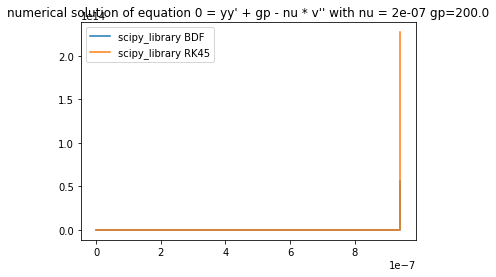

In [22]:
# print(y_numRG4)
plt.figure()
plt.plot(y_scipyBDF.t, y_scipyBDF.y[0,:])
plt.plot(y_scipyRK.t, y_scipyRK.y[0,:])
#plt.plot(xs, y_numEuler[:,1])
#plt.plot(xs, y_numRG4[:, 1])

plt.legend(['scipy_library BDF','scipy_library RK45', 'Adam_Euler', 'Adam_RG4'])
plt.title("numerical solution of equation 0 = yy' + gp - nu * v'' with nu = {} gp={}".format(round(nu,10),gp))

# 0=vv' + (pD)' - nu * v'' differential equation
assuming D and nu constant we can integrate this equation:
const = C = v^2/2 + pD + nu * v' from that we get equation:

**v' = 1/nu * (v^2/2 + pD - C)**

where p is either constant, or p = p0 + g_p * x 

In [23]:
def diffModelP5(v, x, nu, gp, C0):
    """v' = 1/nu * (v^2/2 + C0 + gp * x )     diffequation , gp is a constant : the pressure gradient/density, v is speed
    :param v: speed
    :param x: spatial coordinate
    :return: v'
    """
    dvdx = 1 / nu * (math.pow(v,2.0)/ 2.0 + C0 - gp * x)
    return np.array([dvdx])



In [24]:
def evaluateDEq(diffModel, nu , gp, xs, v0 = 3.0, w0 = 0.0, *args):
    xdiv = 2*nu / v0
    print('theoretical divergence at: {}'.format(xdiv))
    print(' gp parameter {} kin viscosity {}'.format(gp, nu))
    initvals = np.array([v0])  # [v0, v'0]  [m/s , 1/s]

    func = lambda v, x: diffModel(v, x, nu,gp , *args)
    y_numEuler = numSolvers.IVEuler(func, initvals, xs)
    y_numRG4 = numSolvers.RungeKutta4(func, initvals, xs)
    y_retro2 = numSolvers.IVRetorgrad2(func, initvals, xs)
    retro2_div = y_retro2[y_retro2[:, 1] < 1.0e10][-1, 0]
    print("retrograde 2 method diverges at {}".format(retro2_div))
    funcrev = lambda t, v: diffModel(v, t, nu, gp, *args)
    y_scipy = scipy.integrate.solve_ivp(funcrev, [xs.min(), xs.max()], initvals,
                                        method='RK45')
    y_bdf = scipy.integrate.solve_ivp(funcrev, [xs.min(), xs.max()], initvals,
                                        method='BDF')
    #print(y_numRG4)
    plt.figure()
    plt.plot(xs, y_numEuler[:, 1])
    plt.plot(xs, y_numRG4[:, 1])
    plt.plot(xs, y_retro2[:, 1])
    plt.plot(y_scipy.t, y_scipy.y[0, :])
    plt.plot(y_bdf.t, y_bdf.y[0, :])
    plt.legend(['Adam_Euler', 'Adam_RG4', 'Adam_retro2', 'scipy_library RK45', 'scipy_bdf'])
    plt.title("numerical solution of equation yy'= nu * v'' - gp . \n nu {} gp {}".format(nu, gp))
    divpoint = np.max(np.nonzero(y_scipy.y[0, :] < 1e10 ) )
    divergentX = y_scipy.t[divpoint] # it starts to diverge in this point
    print("scipy solution diverges at {}".format(divergentX))
    if (divergentX == xs.max()):
        print('last value {}'.format( y_scipy.y[0, -1]) )
    return [divergentX, retro2_div, y_retro2, y_scipy, y_bdf]

In [25]:
L = 0.1  # meter
xs = np.linspace(0, L, 100)  # meter
DeltaP = 3e5  # 0.1bar
D = 500  # kg/m^3
gp = DeltaP / L / D
#gp = 0.0
# nu for butane is approx 3 *1e-7 m^2/sec
nu = 3.0e-3 # it converges with nu = 3.0e-2 
v0 = 0.01
dvdx0 = 0.1 # for 19 it will be divergent
C0 = nu* dvdx0 -v0**2/2.0
#C0 = 100. -v0**2/2.0
#C0 = -50.10


In [26]:
[divergentX, retro2_div, y_retro2, y_scipy, y_bdf] = evaluateDEq(diffModelP5, nu , gp, xs, v0 , dvdx0, C0 )

theoretical divergence at: 0.6
 gp parameter 6000.0 kin viscosity 0.003
ERROR: OverflowError occured in IVEuler at 
iter: 22 t : 0.022222222222222223
[3.51313892e+301]
ERROR: OverflowError occured in IVEuler at 
iter: 23 t : 0.023232323232323233
[3.51313892e+301]
ERROR: OverflowError occured in IVEuler at 
iter: 24 t : 0.024242424242424242
[3.51313892e+301]
ERROR: OverflowError occured in IVEuler at 
iter: 25 t : 0.025252525252525252
[3.51313892e+301]
ERROR: OverflowError occured in IVEuler at 
iter: 26 t : 0.026262626262626262
[3.51313892e+301]
ERROR: OverflowError occured in IVEuler at 
iter: 27 t : 0.02727272727272727
[3.51313892e+301]
ERROR: OverflowError occured in IVEuler at 
iter: 28 t : 0.028282828282828285
[3.51313892e+301]
ERROR: OverflowError occured in IVEuler at 
iter: 29 t : 0.029292929292929294
[3.51313892e+301]
ERROR: OverflowError occured in IVEuler at 
iter: 30 t : 0.030303030303030304
[3.51313892e+301]
ERROR: OverflowError occured in IVEuler at 
iter: 31 t : 0.031313

OverflowError: math range error

In [ ]:
y_bdf.y.transpose()

In [ ]:
divergentX

In [ ]:
xs.max()

## Absolute trick to get a convergent solution

In [27]:
def diffModelP4B(y, x, gp, nu):
    """ 0 = yy' - gp - nu * v''   diffequation , gp is the pressure gradient/density, y is speed
    :param v: speed
    :param x: spatial coordinate
    :param gp: -1 * pressure gradient/ Density . gp = - 1/D * dp/dx
    :param nu: kinematic viscosity, mu/density
    :return: v' vector
    """
    v, w = y # w = v' the new auxiliary variable
    wabs = math.fabs(w) # absolute value of w= v'
    dvdx = wabs # abs(w)
    dwdx = (v * wabs / nu - gp / nu)
    return np.array([dvdx, dwdx ])

if nu = 0, the equation can be solved analytically:

In [28]:
def analNu0(x,v0,gp):
    ''' analytical solution of vv'= gp equation, when
    :param v0: initial value of v
    '''
    out = math.sqrt(gp * x + v0**2)
    return out

In [29]:
L = 0.1 #meter
xs = np.linspace(0,L, 100) # meter
DeltaP = 1e4 # 0.1bar
D = 500 # kg/m^3
gp = DeltaP /  L / D
mu = 100e-6 # Pa sec
#mu = 50 # fake value
nu = mu /D
print(' gp parameter {} kin viscosity {}'.format(gp, nu))
v0 = 5.0
# dvdx0 = 1.0 / (2. * gp * v0)
dvdx0 = gp/v0
initvals = np.array([v0 , dvdx0]) # [v0, v'0]  [m/s , 1/s]

 gp parameter 200.0 kin viscosity 2.0000000000000002e-07


In [30]:
funcrev = lambda t, v: diffModelP4B(v, t, gp, nu)
nu2 = 0.01
funcrevB = lambda t, v: diffModelP4B(v, t, gp , nu2 )

using variable stepsize implicit Backward Differentials method, that is suggested for stiff problems:

In [31]:
y_scipyBDF = scipy.integrate.solve_ivp(funcrev, [0.0, L], initvals,
                                        method='BDF')


with nu= 0, the above dvdx0 is too high, that would lead to a divergence

In [45]:
y_scipyBDF_B = scipy.integrate.solve_ivp(funcrevB, [0.0, L], [v0, 0.0],
                                        method='BDF')

In [46]:
vBDF = np.hstack( ( y_scipyBDF.t.reshape((-1,1)) , y_scipyBDF.y.transpose()  ) )
vBDF2 = np.hstack( ( y_scipyBDF_B.t.reshape((-1,1)) , y_scipyBDF_B.y.transpose()  ) )

In [47]:
analsolNu0 = np.array( [analNu0(x, initvals[0], gp) for x in xs ] )

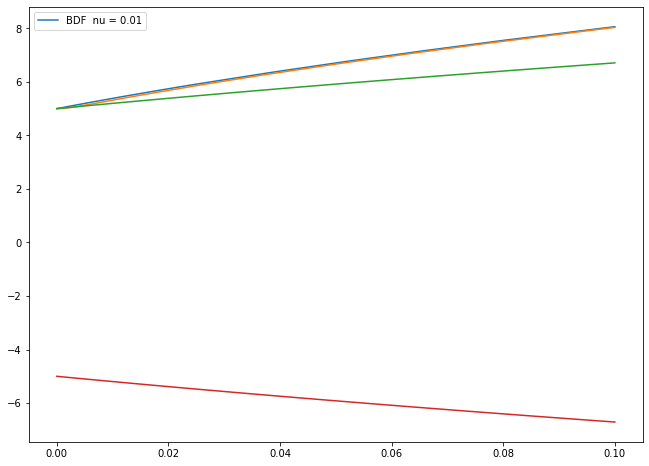

In [50]:
plt.figure(figsize= [11,8])
#plt.subplot(211)
plt.plot(y_scipyBDF.t, y_scipyBDF.y[0,:])
plt.plot(y_scipyBDF_B.t, y_scipyBDF_B.y[0,:])

# plt.plot(xsnew, y_numAdam[:,1])
# plt.plot(y_scipyRK.t, y_scipyRK.y[0,:])
plt.plot(xs, analsolNu0)
plt.plot(xs, - analsolNu0 )
plt.legend(['scipy_library BDF nu {}'.format(round(nu,10) ),
            'BDF  nu = {}'.format(nu2),
          #  'Adam BDF2 fixpoints',
            'analytical solution 1. for nu= 0', 'analytical solution 2. for nu= 0'])
#plt.subplot(212)

plt.legend(['BDF  nu = {}'.format(nu2)])


In [52]:
vBDF

array([[0.00000000e+00, 5.00000000e+00, 4.00000000e+01],
       [2.65918119e-07, 5.00001064e+00, 3.99998964e+01],
       [5.31836238e-07, 5.00002127e+00, 3.99998189e+01],
       [3.19101743e-06, 5.00012764e+00, 3.99989659e+01],
       [5.85019861e-06, 5.00023400e+00, 3.99981153e+01],
       [3.24420105e-05, 5.00129743e+00, 3.99896104e+01],
       [5.90338224e-05, 5.00236064e+00, 3.99811110e+01],
       [3.24951941e-04, 5.01297342e+00, 3.98964686e+01],
       [5.90870060e-04, 5.02356429e+00, 3.98123573e+01],
       [3.25005125e-03, 5.12762573e+00, 3.90043649e+01],
       [5.90923244e-03, 5.22969032e+00, 3.82430443e+01],
       [1.21108980e-02, 5.46132619e+00, 3.66214338e+01],
       [1.83125635e-02, 5.68396325e+00, 3.51874639e+01],
       [2.45142291e-02, 5.89828959e+00, 3.39079344e+01],
       [3.83851852e-02, 6.35134565e+00, 3.14902175e+01],
       [5.22561413e-02, 6.77383214e+00, 2.95253809e+01],
       [6.61270973e-02, 7.17144707e+00, 2.78880803e+01],
       [7.99980534e-02, 7.54825